# WaveRNN - Generate samples

In [1]:
import numpy as np
import torch
from scipy.io import wavfile
from utils.display import *
from models.wavernn import WaveRNN

In [2]:
notebook_name = 'glass_generate_v2'
train_notebook = 'glass_sample_v2'

model_path = f'./outputs/{train_notebook}/model_{train_notebook}.pt'
output_path = f'./outputs/{train_notebook}/gen_{notebook_name}.wav'

sample_rate = 22050
num_samples = int(sample_rate*10)

### Generation

In [3]:
model = WaveRNN().cuda()

Trainable Parameters: 3.050 million


In [4]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [5]:
output, c, f = model.generate(num_samples)

Gen: 1000/1000 -- Speed: 346

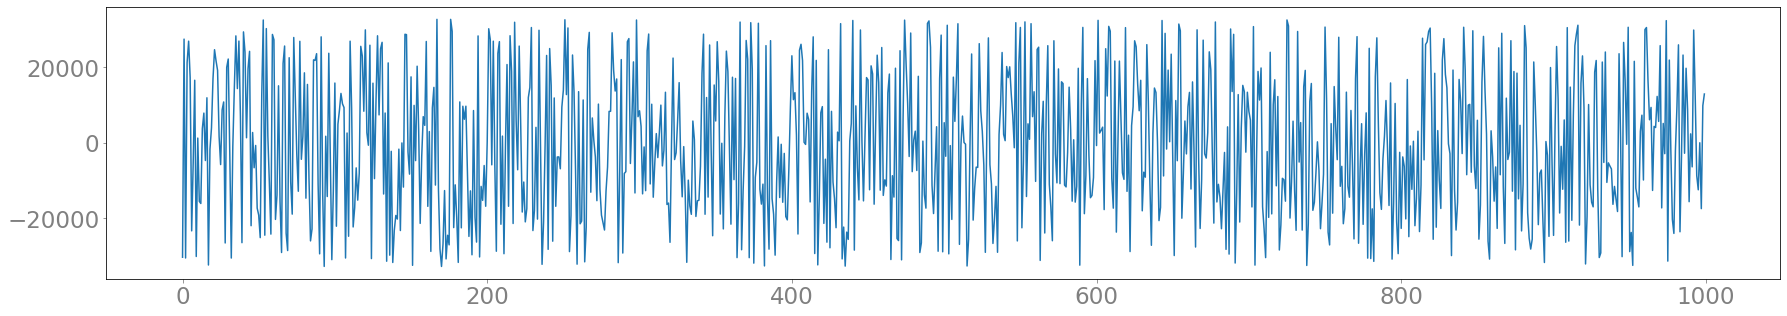

In [6]:
plot(output[:1000])

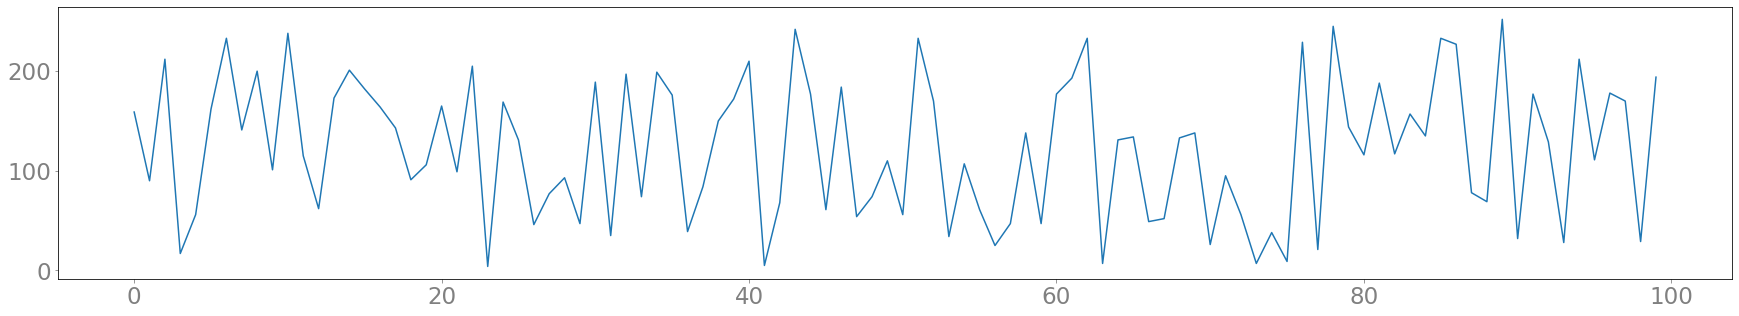

In [7]:
plot(f[:100])

In [8]:
def save_wav(y, filename, sample_rate) :
    y = np.clip(y, -2**15, 2**15 - 1)
    wavfile.write(filename, sample_rate, y.astype(np.int16))

In [9]:
save_wav(output, output_path, sample_rate)